# Installing and Importing Libraries

In [52]:
!pip install pandas
!pip install statsmodels

In [53]:
#importing libraries for cleaning and analysis
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
import os
import time
import seaborn as sns
%matplotlib inline

# Cleaning Dataset 1: Israel Infection

In [54]:
#reading the daily new infections from csv dataset (not yet clipped to our target timeframe)
Infectiondf = pd.read_csv('./Israel_Infection_Translated_Original.csv')

In [55]:
Infectiondf.head(6)

,Date,Age,Infection-Vaccinated,Vaccinated without Validity,Infection-Not Vaccinated,"Infection-Vaccinated per 100,000 residents","Vaccinated without Validity per 100,000 residents","Infection-Not Vaccinated per 100,000 residents"
0,17-01-2021,מתחת לגיל 60,1,0,4436,6.4,0.0,66.6
1,17-01-2021,מעל גיל 60,0,0,243,0.0,0.0,51.4
2,17-01-2021,כלל האוכלוסיה,1,0,4715,3.9,0.0,66.1
3,18-01-2021,מעל גיל 60,4,0,346,19.8,0.0,74.2
4,18-01-2021,מתחת לגיל 60,2,0,8288,7.9,0.0,125.7
5,18-01-2021,כלל האוכלוסיה,6,0,8715,13.2,0.0,123.5


In [56]:
#cleaning the infection dataframe, dropping the unnecessary columns and rows.
Infectiondf = Infectiondf[np.arange(len(Infectiondf)) % 3 == 2]
Infectiondf.drop(["Age",'Infection-Vaccinated per 100,000 residents','Vaccinated without Validity',
                  'Vaccinated without Validity per 100,000 residents',
                 'Infection-Not Vaccinated per 100,000 residents'], 
                 axis = 1, inplace = True)
Infectiondf.reset_index(drop=True, inplace=True)
Infectiondf.rename(columns={"Infection-Not Vaccinated":"Infection-Not_Vaccinated"})

Infectiondf

,Date,Infection-Vaccinated,Infection-Not Vaccinated
0,17-01-2021,1,4715
1,18-01-2021,6,8715
2,19-01-2021,9,7330
3,20-01-2021,18,7157
4,21-01-2021,8,301
...,...,...,...
312,25-11-2021,64,394
313,26-11-2021,76,397
314,27-11-2021,23,125
315,28-11-2021,86,384


In [57]:
#During this period Alpha is the dominant variant
#Establish the daily new infection dataset for this 'Alpha Period' Only (2021/01/17 - 2021/03/06)
InfectionAlphaDf = Infectiondf[0:49] 
InfectionAlphaDf['Ticks'] = range(0,len(InfectionAlphaDf.index.values))
InfectionAlphaDf
InfectionAlphaDf_sum = InfectionAlphaDf

In [58]:
#Using tidy data principles to prepare dataset: https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html
InfectionAlphaDf_melt = InfectionAlphaDf.melt(id_vars = ["Date", "Ticks"], var_name="Type", value_name="count")
InfectionAlphaDf_melt

,Date,Ticks,Type,count
0,17-01-2021,0,Infection-Vaccinated,1
1,18-01-2021,1,Infection-Vaccinated,6
2,19-01-2021,2,Infection-Vaccinated,9
3,20-01-2021,3,Infection-Vaccinated,18
4,21-01-2021,4,Infection-Vaccinated,8
...,...,...,...,...
93,02-03-2021,44,Infection-Not Vaccinated,133
94,03-03-2021,45,Infection-Not Vaccinated,3480
95,04-03-2021,46,Infection-Not Vaccinated,2750
96,05-03-2021,47,Infection-Not Vaccinated,95


In [59]:
#save the cleaned dataset to file
Infectiondf.to_csv('Israel_Infection.csv')
InfectionAlphaDf.to_csv('Israel_Infection_Alpha_Period.csv')

In [60]:
#New sum column for Central tendency calculation
sum_column = InfectionAlphaDf_sum["Infection-Vaccinated"] + InfectionAlphaDf_sum["Infection-Not Vaccinated"] 
InfectionAlphaDf_sum ["Total cases"] = sum_column
InfectionAlphaDf_sum_2 = InfectionAlphaDf_sum[["Infection-Vaccinated","Total cases"]]

# Cleaning Dataset 2: Israel Vaccination

In [61]:
#opening and reading the vaccination data (not yet clipped to our target timeframe)
Vaccinationsdf = pd.read_csv('./Israel_Vaccination_Translated_Original.csv')

In [62]:
Vaccinationsdf.head()

,Date,First_Dose_Counts,Second_Dose_Counts,Third_Dose_Counts,First_Dose_Percentage,Second_Dose_Percentage,Third_Dose_Percetage,Percentage_Not_Vaccinated,Percentage_of_Invalid_Vaccinations,Percentage_of_Vaccinated
0,19-12-2020,65,1,0,0.00,0.0,0.0,100.0,0.0,0.0
1,20-12-2020,7450,1,0,0.08,0.0,0.0,100.0,0.0,0.0
2,21-12-2020,32357,1,0,0.35,0.0,0.0,100.0,0.0,0.0
3,22-12-2020,76990,1,0,0.83,0.0,0.0,100.0,0.0,0.0
4,23-12-2020,139878,1,0,1.50,0.0,0.0,100.0,0.0,0.0


In [63]:
#cleaning the Vaccinationsdf Dataset, dropping the unnecessary columns

Vaccinationsdf.drop(["First_Dose_Counts",'Second_Dose_Counts',
             "Third_Dose_Counts", "Percentage_Not_Vaccinated",
             "Percentage_of_Invalid_Vaccinations", "Percentage_of_Vaccinated"], 
                 axis = 1, inplace = True)



In [64]:
#The daily counts of people vaccinated as a  percentage of the Israeli population is clipped to 
#only include the rows related to our analysis.
#However, we take considerations of the fact that
#the antibody give by vaccine takes two weeks to reach its maximum

# Extract the data  for the target timeframe (two weeks before 2021/01/17) - (two weeks before 2021/03/06)
Vaccinationsdf = Vaccinationsdf[15:64]

Vaccinationsdf.reset_index(drop=True, inplace=True)
Vaccinationsdf['Ticks'] = range(0,len(Vaccinationsdf.index.values))
Vaccinationsdf



,Date,First_Dose_Percentage,Second_Dose_Percentage,Third_Dose_Percetage,Ticks
0,03-01-2021,13.81,0.00,0.0,0
1,04-01-2021,15.45,0.00,0.0,1
2,05-01-2021,16.79,0.00,0.0,2
3,06-01-2021,17.90,0.00,0.0,3
4,07-01-2021,19.15,0.00,0.0,4
5,08-01-2021,19.86,0.00,0.0,5
6,09-01-2021,20.34,0.00,0.0,6
7,10-01-2021,20.75,0.06,0.0,7
8,11-01-2021,20.97,0.27,0.0,8
9,12-01-2021,21.23,0.66,0.0,9


In [65]:
#New df linear regression
Vax= Vaccinationsdf[["Ticks","First_Dose_Percentage"]]

In [66]:
#Using tidy data principles to prepare dataset: https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html
#Vaccinationsdf_melt uesd for data visualization
Vaccinationsdf_melt = Vaccinationsdf.melt(id_vars = ["Date", "Ticks"], var_name="Type", value_name="count")
Vaccinationsdf_melt

,Date,Ticks,Type,count
0,03-01-2021,0,First_Dose_Percentage,13.81
1,04-01-2021,1,First_Dose_Percentage,15.45
2,05-01-2021,2,First_Dose_Percentage,16.79
3,06-01-2021,3,First_Dose_Percentage,17.90
4,07-01-2021,4,First_Dose_Percentage,19.15
...,...,...,...,...
142,16-02-2021,44,Third_Dose_Percetage,0.00
143,17-02-2021,45,Third_Dose_Percetage,0.00
144,18-02-2021,46,Third_Dose_Percetage,0.00
145,19-02-2021,47,Third_Dose_Percetage,0.00


In [67]:
# Saved the cleaned vaccination dataframe to file
Vaccinationsdf.to_csv('Israel_Vaccination_Data_Alpha_Period.csv')

# Cleaning Dataset 3: Israel Daily Tests

In [68]:
#opening and reading the completed original data of daily tests to estimate the population "p" at risk of infection
DailyTestsdf = pd.read_csv('./Israel_Daily_Tests_Translated_Original.csv')

In [69]:
DailyTestsdf

,Date,Number_of_Virus_Discovery,Number_of_Speed_Tests,Total_tests
0,20-02-2020,29,0,29
1,21-02-2020,28,0,28
2,22-02-2020,13,0,13
3,23-02-2020,56,0,56
4,24-02-2020,74,0,74
...,...,...,...,...
645,26-11-2021,84058,14186,98244
646,27-11-2021,34718,24700,59418
647,28-11-2021,85818,24182,110000
648,29-11-2021,110836,38545,149381


In [70]:
DailyTestsdf.drop(["Number_of_Virus_Discovery", "Number_of_Speed_Tests"], axis = 1, inplace = True)
DailyTestsdf.head()

,Date,Total_tests
0,20-02-2020,29
1,21-02-2020,28
2,22-02-2020,13
3,23-02-2020,56
4,24-02-2020,74


In [71]:
# cleaning the daily tests data set to included only the dates in our target timeframe
DailyTestsdf = DailyTestsdf[332:381]

DailyTestsdf.reset_index(drop=True, inplace=True)

DailyTestsdf

,Date,Total_tests
0,17-01-2021,63376
1,18-01-2021,100611
2,19-01-2021,94663
3,20-01-2021,91832
4,21-01-2021,81169
5,22-01-2021,84649
6,23-01-2021,30429
7,24-01-2021,53503
8,25-01-2021,89948
9,26-01-2021,82173


In [72]:
#saving this cleaned dataframe for daily tests to csv file
DailyTestsdf.to_csv('Israel_Daily_Tests_Data_Alpha_Period.csv')

# Hypothesis Test

In [73]:
#setup the contigency table for proportion-testing vaccine efficacy against severe cases
#it seems like there aren't enough data for analyzing vaccince efficacy against infection

In [74]:
from statsmodels.stats.proportion import proportions_ztest

In [75]:
#This variable gives the mean of daily infections who are vaccinated for the 49-day timeframe
Daily_Cases_Vaccinated_Alpha = (InfectionAlphaDf["Infection-Vaccinated"]).mean()
Daily_Cases_Vaccinated_Alpha

66.10204081632654

In [76]:
#This variable gives the mean of daily infections who are NOT vaccinated for the 49-day timeframe
Daily_Cases_Not_Vaccinated_Alpha = (InfectionAlphaDf["Infection-Not Vaccinated"]).mean()
Daily_Cases_Not_Vaccinated_Alpha

3013.5102040816328

In [77]:
#This variable gives the mean size of the population at risk for the 49-day timeframe
Daily_Polulation_at_Risk_Alpha = (DailyTestsdf["Total_tests"]).mean()

Daily_Polulation_at_Risk_Alpha 

68685.02040816327

In [78]:
#This variable gives the mean vaccination percentage of the Israeli population for the 49-day timeframe
#However we take consideration of the fact the antibody give by the vaccine takes two weeks to reach its maximum

Average_Vaccination_Percentage_Israel = (Vaccinationsdf["Second_Dose_Percentage"]).mean()/100
Average_Vaccination_Percentage_Israel

0.1451510204081633

In [79]:
# Preparing the contingency table for two-sample hypothesis testing
# Please note the following assumptions
# The first row "Daily Covid Cases" contains values averaged from the Israeli National dataset
# The second row is not meaningful for our calculations  
# The third column of the third row "Total population at Risk" is estimated by the average number of daily Covid tests taken
# We assume that the population exposed to covid risks has a similar vaccination status as the gerneral Israeli public
# Thus, the first and second column is estimated by (Total Population at Risk*Average Israeli Vaccination Percentage)

Dict_contingency_table = {'Vaxxed':[Daily_Cases_Vaccinated_Alpha,
                                        Average_Vaccination_Percentage_Israel*Daily_Polulation_at_Risk_Alpha], 
            'Unvaxxed': [Daily_Cases_Not_Vaccinated_Alpha,
                            (1 - Average_Vaccination_Percentage_Israel)*Daily_Polulation_at_Risk_Alpha],
                   'Total': [Daily_Cases_Not_Vaccinated_Alpha+Daily_Cases_Vaccinated_Alpha,
                            Daily_Polulation_at_Risk_Alpha ]}

Contingency_table = pd.DataFrame(Dict_contingency_table, index = ['Daily Covid Cases by Vaxx Status',
                                              'Population at Risk by Vaxx Status'])
Contingency_table

#We can't get statistics for 'Not_Determined'. These data won't be collected
#by any databases 

,Vaxxed,Unvaxxed,Total
Daily Covid Cases by Vaxx Status,66.102041,3013.510204,3079.612245
Population at Risk by Vaxx Status,9969.700799,58715.319609,68685.020408


In [80]:
#Hypothesis testing

#according to the contingency table displayed above, we derived that for our pythonthese testing
# x1 = 66.102041, x2 = 3013.510204
# p1 = 9969.700799, p2 = 58715.319609
# Ho: p1 = p2
# Ha: p1 < p2

#setup a significance level
SL = 0.05

#setup the numpy array for x1 and x2
number_of_incidences = np.array([66.102041, 3013.510204])

#setup the numpy array for n1 and n2
total_sample_sizes = np.array([9969.700799, 58715.319609])

# Compute test statistics and p-value
(test_stat, p_value) = proportions_ztest(number_of_incidences, total_sample_sizes, alternative= 'smaller')
print(test_stat)
print(p_value)

#printing the result:
if (p_value < 0.001): 
    print("There is very strong evidence against the null hypothesis." + "\n" +
    "The sample evidence suggests very strongly that fully vaccinated population" + "\n" +
    "have lower chances of being infected than the not fully vaccinated population.")
elif (p_value < 0.01):
    print("There is strong evidence against the null hypothesis.")
elif (p_value < SL):
    print("There is moderate evidence against the null hypothesis.")
else:
    print("Do not reject the null hypothesis. The sample evidence is in \
          accordance with the statement in the null hypothesis.")
    


-19.937797368034737
9.565238219571445e-89
There is very strong evidence against the null hypothesis.
The sample evidence suggests very strongly that fully vaccinated population
have lower chances of being infected than the not fully vaccinated population.


# Central Tendency & Distribution 

In [81]:
InfectionAlphaDf.describe()

,Infection-Vaccinated,Infection-Not Vaccinated,Ticks,Total cases
count,49.000000,49.000000,49.00000,49.000000
mean,66.102041,3013.510204,24.00000,3079.612245
std,45.722098,2403.694579,14.28869,2411.811679
min,1.000000,64.000000,0.00000,90.000000
25%,29.000000,287.000000,12.00000,393.000000
50%,59.000000,3261.000000,24.00000,3323.000000
75%,100.000000,4469.000000,36.00000,4524.000000
max,174.000000,8715.000000,48.00000,8721.000000


# Data Visualization

Text(0, 0.5, 'Number of Daily COVID-19 Cases')

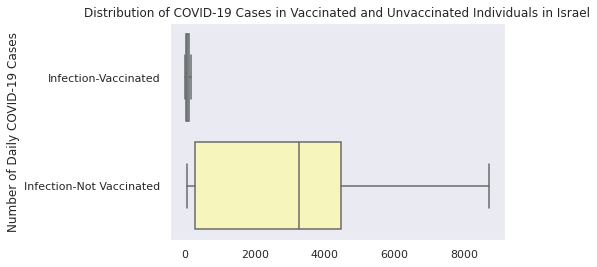

In [82]:
InfectionAlphaDf_both = InfectionAlphaDf[["Infection-Vaccinated","Infection-Not Vaccinated" ]]

fig = sns.boxplot(data=InfectionAlphaDf_both, orient="h", palette = "Set3")
plt.title("Distribution of COVID-19 Cases in Vaccinated and Unvaccinated Individuals in Israel")
plt.ylabel("Number of Daily COVID-19 Cases")


<AxesSubplot:title={'center':'Distribution of COVID-19 Cases in Vaccinated Individuals'}, ylabel='Number of Daily COVID-19 Cases'>

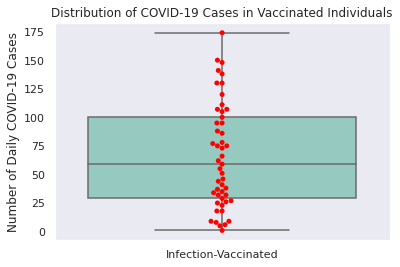

In [83]:
#box plot to describle central tendency
InfectionAlphaDf_Vax = InfectionAlphaDf[["Infection-Vaccinated"]]

sns.boxplot(data=InfectionAlphaDf_Vax,palette = "Set3")
plt.title("Distribution of COVID-19 Cases in Vaccinated Individuals")
plt.ylabel("Number of Daily COVID-19 Cases")

sns.swarmplot(data=InfectionAlphaDf_Vax, color="red")

<AxesSubplot:title={'center':'Distribution of COVID-19 Cases in Unvaccinated Individuals'}, ylabel='Number of Daily COVID-19 Cases'>

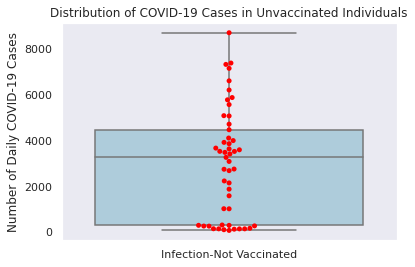

In [84]:
InfectionAlphaDf_UnVax = InfectionAlphaDf[["Infection-Not Vaccinated"]]

sns.boxplot(data=InfectionAlphaDf_UnVax,palette = "Paired")
plt.title("Distribution of COVID-19 Cases in Unvaccinated Individuals")
plt.ylabel("Number of Daily COVID-19 Cases")

sns.swarmplot(data=InfectionAlphaDf_UnVax, color="red")

Text(0, 0.5, 'Number of Daily COVID-19 Cases')

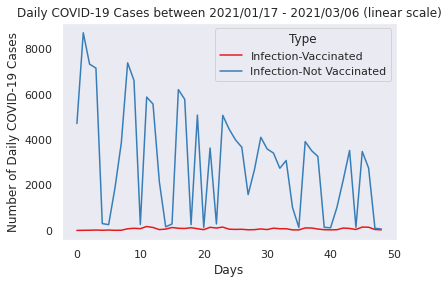

In [85]:
sns.lineplot(data=InfectionAlphaDf_melt, x="Ticks", y="count", hue = "Type", palette = "Set1" )
plt.title('Daily COVID-19 Cases between 2021/01/17 - 2021/03/06 (linear scale)')
plt.xlabel('Days')
plt.ylabel('Number of Daily COVID-19 Cases')


Text(0, 0.5, 'Number of Daily COVID-19 Cases')

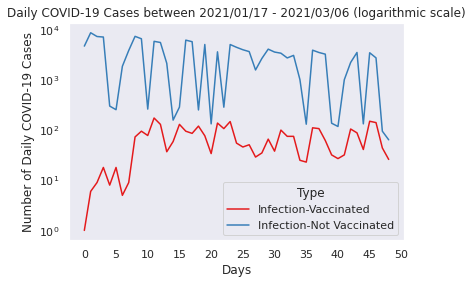

In [86]:
sns.set_theme(style="dark")
g = sns.lineplot(
    data=InfectionAlphaDf_melt,
    x="Ticks", y="count", hue="Type",
    legend=True,palette = "Set1" 
)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
ax.set_yscale('log')
plt.title('Daily COVID-19 Cases between 2021/01/17 - 2021/03/06 (logarithmic scale)')
plt.xlabel('Days')
plt.ylabel('Number of Daily COVID-19 Cases')

Text(0, 0.5, 'Number of Vaccines Distributed in %')

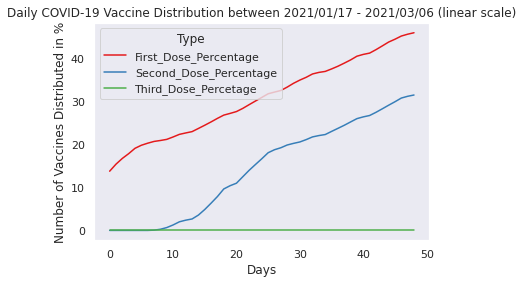

In [87]:
sns.lineplot(data=Vaccinationsdf_melt, x="Ticks", y="count", hue = "Type", palette = "Set1" )
plt.title('Daily COVID-19 Vaccine Distribution between 2021/01/17 - 2021/03/06 (linear scale)')
plt.xlabel('Days')
plt.ylabel('Number of Vaccines Distributed in %')


<AxesSubplot:>

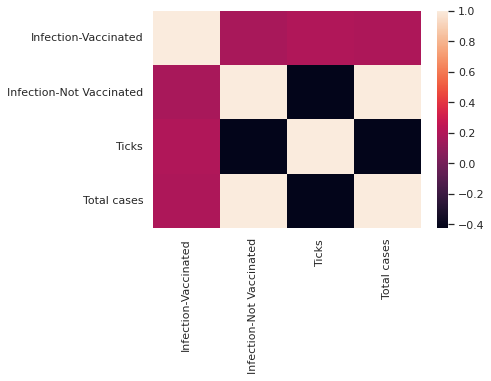

In [88]:
#Heat map
sns.heatmap(InfectionAlphaDf.corr())

# Linear Regression Model: Setup

In [89]:
#model to understand the relationship between total cases and vaccinated individuals (model 1)as well as total cases in unvaccinated individuals (model 2)

In [90]:
#create dataset for both models 

#Total cases and vaccinated individuals df
Vaxx = InfectionAlphaDf[["Infection-Vaccinated","Total cases"]]

#Total cases and unvaccinated individuals df
Unvaxx = InfectionAlphaDf[["Infection-Not Vaccinated","Total cases"]]


# Linear Regression Model: Vaccinated Individuals

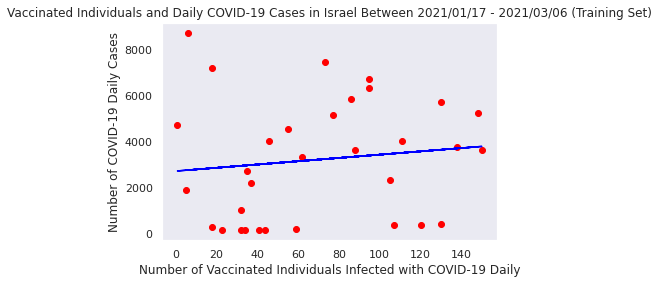

In [91]:
#For Vaxx

#linear regression 
#import data for analysis 
x = Vaxx.iloc[:,:-1]
y = Vaxx.iloc[:,-1]

#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 1/3, random_state = 0)


#Training the Simple Linear Regression model on the training set 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

#Predicting the Test results
y_pred = regressor.predict(x_test)


#Visualizing the training set results 
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Vaccinated Individuals and Daily COVID-19 Cases in Israel Between 2021/01/17 - 2021/03/06 (Training Set)')
plt.xlabel('Number of Vaccinated Individuals Infected with COVID-19 Daily')
plt.ylabel('Number of COVID-19 Daily Cases')
slope, intercept, r_value, p_value, std_err = stats.linregress(Vaxx['Infection-Vaccinated'],Vaxx['Total cases'])



In [92]:
#R squared value 
from sklearn.metrics import r2_score 
print("Model score:", str(regressor.score(x_test, y_test)))

Model score: 0.05531040437958534


In [93]:
#Vaxx line equation
print("For vaccinated individuals, the equation of the line is: y ="+str(slope)+ "x+"+str(intercept))

For vaccinated individuals, the equation of the line is: y =9.848900929044436x+2428.5797936903073


In [94]:
#Vaxx p-value
print (p_value)

0.19894276702435948


In [95]:
#Vaxx standard error
print (std_err)

7.558980586997641


Text(0, 0.5, 'Number of COVID-19 Daily Cases')

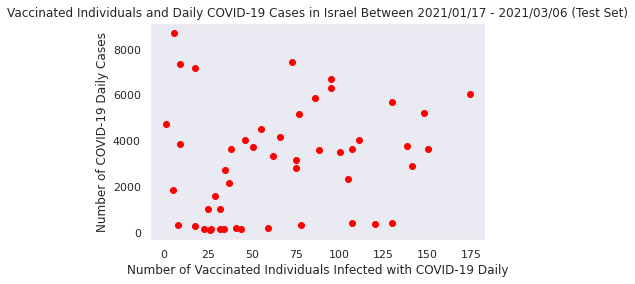

In [96]:
#Visualizing the test results Vaxx
plt.scatter(Vaxx[['Infection-Vaccinated']],Vaxx[['Total cases']], color = 'red')
plt.title('Vaccinated Individuals and Daily COVID-19 Cases in Israel Between 2021/01/17 - 2021/03/06 (Test Set)')
plt.xlabel('Number of Vaccinated Individuals Infected with COVID-19 Daily')
plt.ylabel('Number of COVID-19 Daily Cases')


# Linear Regression Model: Unvaccinated Individuals

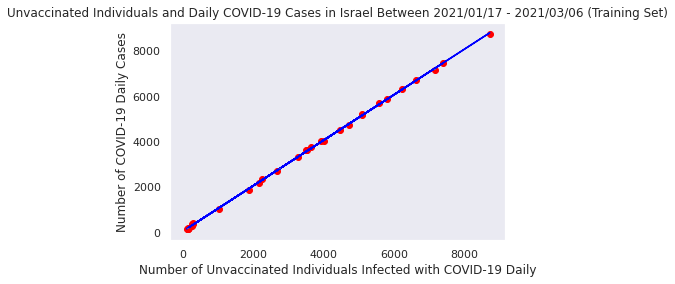

In [97]:
#For Unvaxx

#linear regression 
#import data for analysis 
x = Unvaxx.iloc[:,:-1]
y = Unvaxx.iloc[:,-1]

#splitting the dataset into the training set and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 1/3, random_state = 0)


#Training the Simple Linear Regression model on the training set 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

#Predicting the Test results
y_pred = regressor.predict(x_test)

#Visualizing the training set results 
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train),color = 'blue')
plt.errorbar(x,y, yerr=0.5, fmt=' ', markeredgewidth=2)
plt.title('Unvaccinated Individuals and Daily COVID-19 Cases in Israel Between 2021/01/17 - 2021/03/06 (Training Set)')
plt.xlabel('Number of Unvaccinated Individuals Infected with COVID-19 Daily')
plt.ylabel('Number of COVID-19 Daily Cases')
slope, intercept, r_value, p_value, std_err = stats.linregress(Unvaxx['Infection-Not Vaccinated'],Unvaxx['Total cases'])




In [98]:
#R squared value / model score
from sklearn.metrics import r2_score 
print("Model score:", str(regressor.score(x_test, y_test)))

Model score: 0.9994664501750938


In [99]:
#Unvaxx line equation
print("For vaccinated individuals, the equation of the line is: y ="+str(slope)+ "x+"+str(intercept))

For vaccinated individuals, the equation of the line is: y =1.0032017178442854x+56.45363142198221


In [100]:
#Unvaxx p-value
print (p_value)

6.700655588969169e-83


In [101]:
#Unvaxx standard error
print (std_err)

0.002734997625589463


Text(0, 0.5, 'Number of COVID-19 Daily Cases')

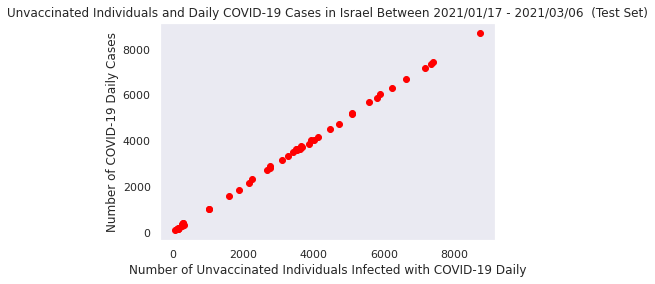

In [102]:
#Visualizing the test results Unvaxx
plt.scatter(Unvaxx[['Infection-Not Vaccinated']],Unvaxx[['Total cases']], color = 'red')
plt.title('Unvaccinated Individuals and Daily COVID-19 Cases in Israel Between 2021/01/17 - 2021/03/06  (Test Set)')
plt.xlabel('Number of Unvaccinated Individuals Infected with COVID-19 Daily')
plt.ylabel('Number of COVID-19 Daily Cases')
